In [113]:
import tensorflow as tf
from tensorflow import keras as ks
from keras import Sequential
from keras.layers import Flatten,Dense,Conv2D, MaxPooling2D
import tensorflow_datasets as tfds
import math
import numpy as np

In [114]:
datasets,metadata = tfds.load('fashion_mnist',as_supervised = True,with_info = True)
train_data ,  test_data = datasets['train'],datasets['test']

In [115]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [116]:
print("Number of training data")
metadata.splits['train'].num_examples

Number of training data


60000

In [117]:
print("Number of test data")
metadata.splits['test'].num_examples

Number of test data


10000

In [118]:
def normalize(images,labels):
    images = tf.cast(images,tf.float32)
    images/=255
    return images,labels

In [119]:
train_data.map(normalize)
test_data.map(normalize)

<_MapDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

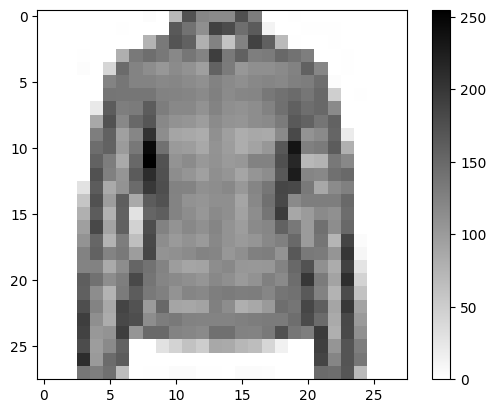

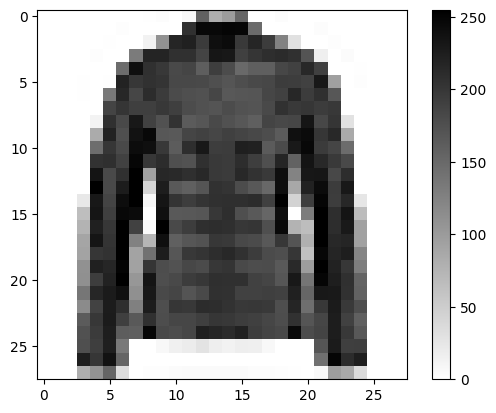

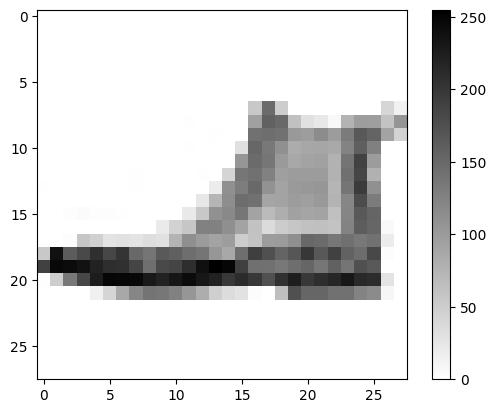

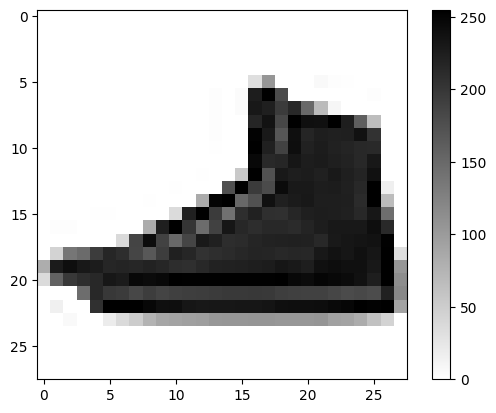

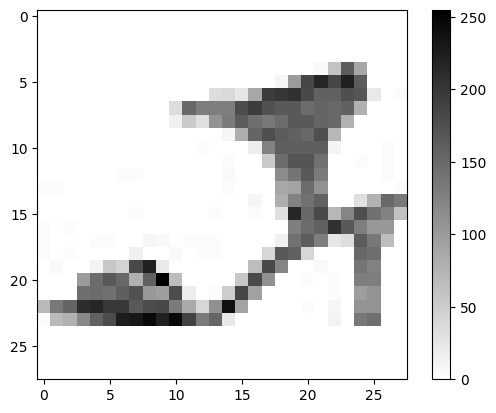

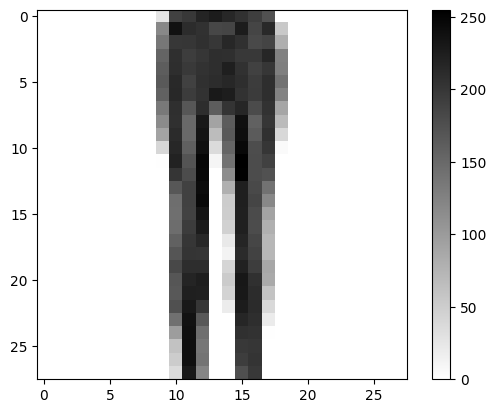

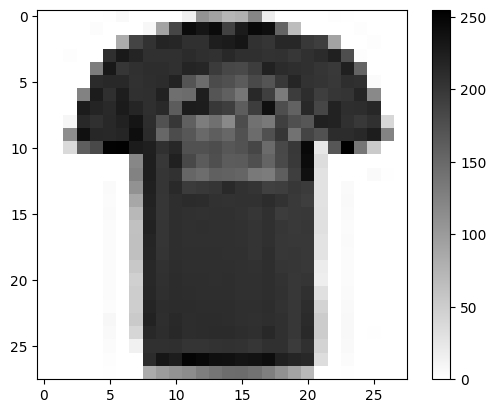

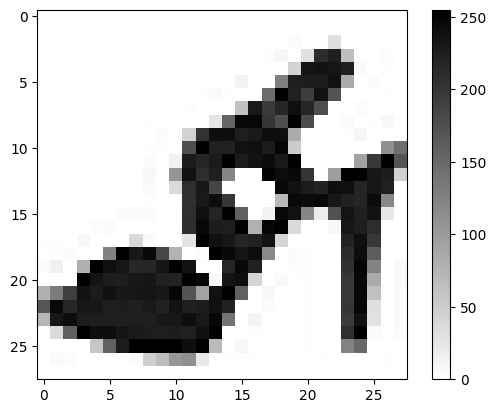

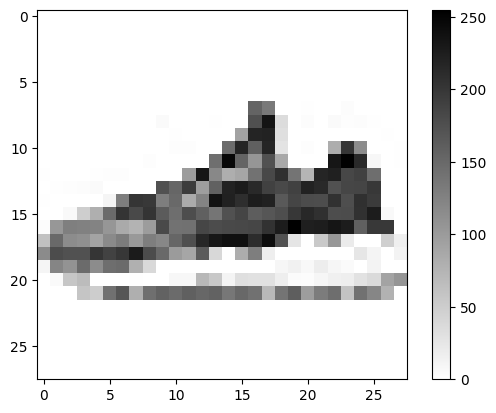

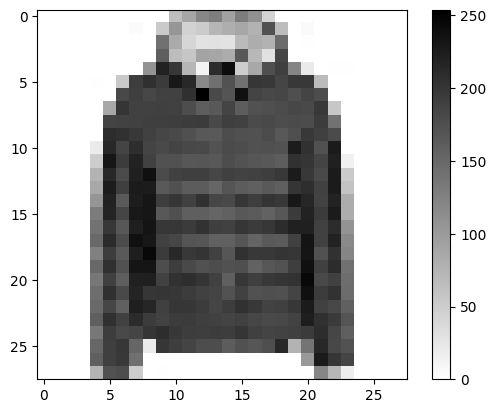

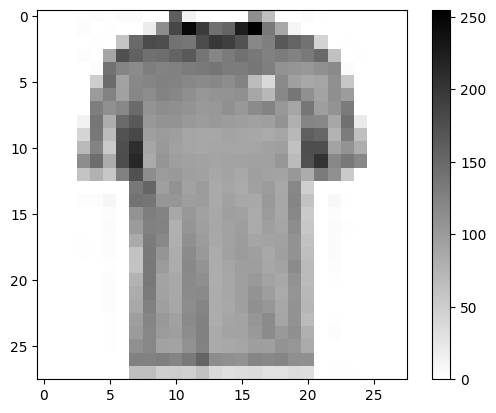

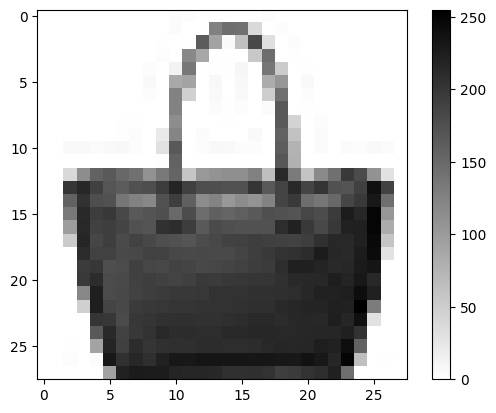

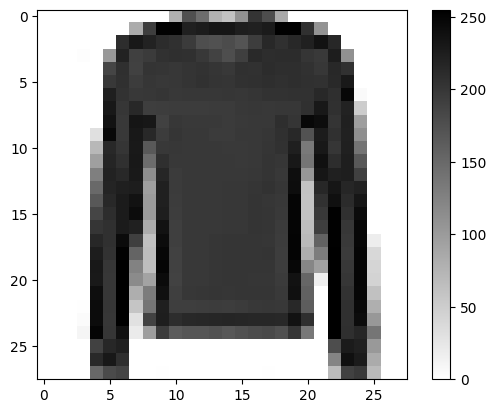

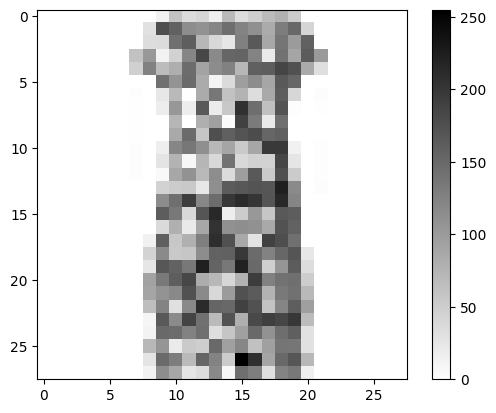

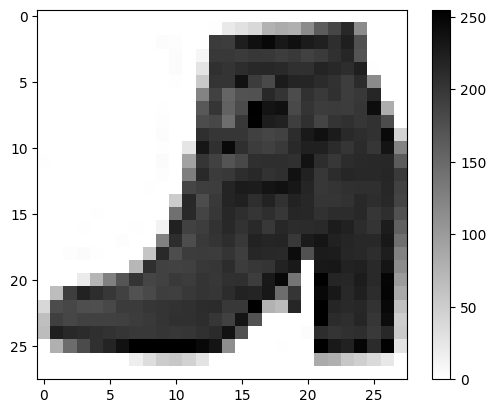

In [120]:
import matplotlib.pyplot as plt
for image,label in test_data.take(15):
    image = image.numpy().reshape((28,28))
    plt.figure()
    plt.imshow(image,cmap = plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()



In [121]:
model = Sequential()
model.add(Flatten(input_shape = (28,28,1)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [122]:
model.compile(optimizer = 'Adam',  loss = 'sparse_categorical_crossentropy', metrics = ['Accuracy'])

In [123]:
batch_size = 32
train_data_size = metadata.splits['train'].num_examples
train_data = train_data.repeat().shuffle(train_data_size).batch(32)
test_data = test_data.batch(32)

In [124]:
model.fit(train_data,epochs = 15, steps_per_epoch = math.ceil(train_data_size/32))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - Accuracy: 0.6776 - loss: 10.5379
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.7058 - loss: 0.7889
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - Accuracy: 0.7362 - loss: 0.6858
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.7715 - loss: 0.5987
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8033 - loss: 0.5473
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8137 - loss: 0.5282
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8144 - loss: 0.5163
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8165 - loss: 0.5224
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8254 - loss: 0.4939
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8249 - loss: 0.4903
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8282 - loss: 0.4806
Epoch 12/15
1875/1875 ━━━━━━━

In [125]:
test_loss, test_accuracy = model.evaluate(test_data, steps = math.ceil(train_data_size/32))
test_accuracy

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 231us/step - Accuracy: 0.8128 - loss: 0.6250


0.8123999834060669

In [126]:
for test_images,test_labels in test_data.take(1):
    test_image = test_images.numpy()
    test_label = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [127]:
np.argmax(predictions[0])

4

In [128]:
test_label

array([4, 4, 9, 7, 5, 1, 0, 5, 7, 4, 0, 8, 2, 3, 9, 0, 7, 7, 2, 2, 0, 4,
       4, 4, 2, 7, 7, 4, 2, 4, 7, 5], dtype=int64)

In [129]:
def plot_image(i,prediction_array, true_label, images):
    predction_array, true_label, img = prediction_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap = plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color= 'blue'
    else:
        color = 'red'


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10) ,predictions_array, color = "green")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

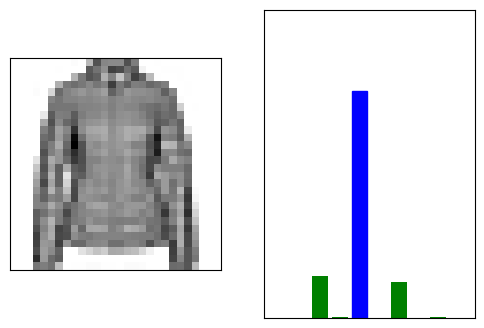

In [130]:
for i in range(1):
    plt.figure(figsize = (6,4))
    plt.subplot(1,2,1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)

In [131]:
datasets1,metadata1 = tfds.load('fashion_mnist',as_supervised = True,with_info = True)
train_data1 ,  test_data1 = datasets1['train'],datasets['test']

In [132]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D((2,2), strides = 2))
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2),strides = 2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))
          

In [133]:
model.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [134]:
batch_size = 32
train_data_size = metadata.splits['train'].num_examples
train_data1 = train_data1.repeat().shuffle(train_data_size).batch(32)
test_data1 = test_data1.batch(32)

In [135]:
model.fit(train_data1, epochs = 15, steps_per_epoch = math.ceil(train_data_size/32))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8034 - loss: 1.5489
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8919 - loss: 0.2942
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9080 - loss: 0.2471
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9154 - loss: 0.2236
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9250 - loss: 0.2064
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9297 - loss: 0.1843
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9375 - loss: 0.1681
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9435 - loss: 0.1514
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9486 - loss: 0.1405
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9507 - loss: 0.1304
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9524 - loss: 0.1275
Epoch 12

In [136]:
test_loss, test_accuracy = model.evaluate(test_data1, steps = math.ceil(train_data_size/32))
test_accuracy

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.9004 - loss: 0.4866


0.9000999927520752

In [137]:
for test_images,test_labels in test_data1.take(1):
    test_image = test_images.numpy()
    test_label = test_labels.numpy()
    predictions = model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


In [138]:
def plot_image(i,prediction_array, true_label, images):
    predction_array, true_label, img = prediction_array[i], true_label[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[...,0], cmap = plt.cm.binary)
    predicted_label = np.argmax(prediction_array)
    if predicted_label == true_label:
        color= 'blue'
    else:
        color = 'red'


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    this_plot = plt.bar(range(10) ,predictions_array, color = "green")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    this_plot[predicted_label].set_color('red')
    this_plot[true_label].set_color('blue')

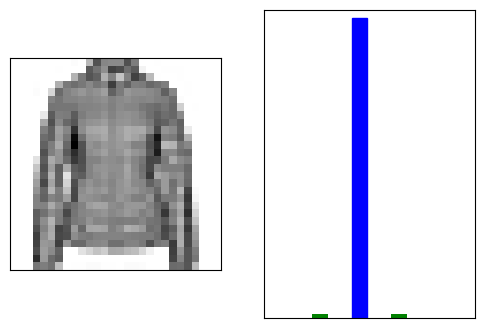

In [139]:
for i in range(1):
    plt.figure(figsize = (6,4))
    plt.subplot(1,2,1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions, test_labels)